In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df=pd.read_excel('AllTransactionsReport_01_01_21_to_31_12_21.xlsx')

In [3]:
Type=list(df['Type'])

In [4]:
sale=[]
dates=[]
for i,j in enumerate(Type):
    if j=='Sale':
        sale.append(df['Total'].iloc[i])
        dates.append(df['Date'].iloc[i])

In [5]:
sales=pd.DataFrame()

In [6]:
sales['Date']=dates
sales['Sales']=sale

In [7]:
sales['Date']=pd.to_datetime(sales['Date'])

In [8]:
sales.head()

,Date,Sales
0,2021-01-01,3300.0
1,2021-03-01,20240.0
2,2021-03-01,5700.0
3,2021-04-01,41280.0
4,2021-05-01,83190.0


In [9]:
str(sales['Date'][1].month)+'-'+str(sales['Date'][1].year)

'3-2021'

In [10]:
monthwise=[]
s=0
for m in range(1,13):
    for i,j in enumerate(sales['Date']):
        l=sales['Date'][i].month
        if l==m:
            s=s+sales['Sales'].iloc[i]
    monthwise.append(s)
    s=0
            
        

    

In [11]:
monthwise

[570881.0,
 339843.0,
 299564.0,
 443315.0,
 457616.0,
 576618.0,
 463216.0,
 472102.0,
 754251.0,
 718864.0,
 605998.0,
 586972.0]

In [12]:
date=[]
for i in range(1,13):
    
    d='2021/'+str(i)
    
    date.append(d)

In [13]:
date

['2021/1',
 '2021/2',
 '2021/3',
 '2021/4',
 '2021/5',
 '2021/6',
 '2021/7',
 '2021/8',
 '2021/9',
 '2021/10',
 '2021/11',
 '2021/12']

In [14]:
Sale=pd.DataFrame()

In [15]:
Sale['Date']=pd.to_datetime(date)

In [16]:
Sale['Sales']=monthwise

In [17]:
Sale

,Date,Sales
0,2021-01-01,570881.0
1,2021-02-01,339843.0
2,2021-03-01,299564.0
3,2021-04-01,443315.0
4,2021-05-01,457616.0
5,2021-06-01,576618.0
6,2021-07-01,463216.0
7,2021-08-01,472102.0
8,2021-09-01,754251.0
9,2021-10-01,718864.0


In [18]:
Sale['Date'][3].month

4

In [19]:
change_format=Sale['Date'].dt.strftime('%d/%m/%Y')

In [20]:
Sale['Date']=change_format

In [21]:
Sale

,Date,Sales
0,01/01/2021,570881.0
1,01/02/2021,339843.0
2,01/03/2021,299564.0
3,01/04/2021,443315.0
4,01/05/2021,457616.0
5,01/06/2021,576618.0
6,01/07/2021,463216.0
7,01/08/2021,472102.0
8,01/09/2021,754251.0
9,01/10/2021,718864.0


In [22]:
Sale=Sale.set_index('Date')

In [23]:
Sale

,Sales
Date,
01/01/2021,570881.0
01/02/2021,339843.0
01/03/2021,299564.0
01/04/2021,443315.0
01/05/2021,457616.0
01/06/2021,576618.0
01/07/2021,463216.0
01/08/2021,472102.0
01/09/2021,754251.0


In [24]:
Sale=Sale.squeeze()

In [25]:
Sale

Date
01/01/2021    570881.0
01/02/2021    339843.0
01/03/2021    299564.0
01/04/2021    443315.0
01/05/2021    457616.0
01/06/2021    576618.0
01/07/2021    463216.0
01/08/2021    472102.0
01/09/2021    754251.0
01/10/2021    718864.0
01/11/2021    605998.0
01/12/2021    586972.0
Name: Sales, dtype: float64

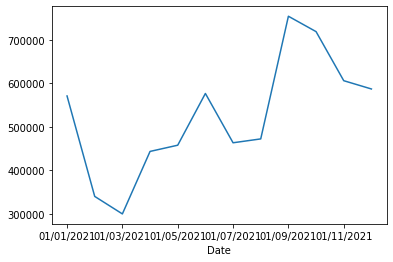

In [26]:
Sale.plot()

In [27]:
Sale.describe()

count        12.000000
mean     524103.333333
std      137587.433597
min      299564.000000
25%      454040.750000
50%      521491.500000
75%      591728.500000
max      754251.000000
Name: Sales, dtype: float64

In [28]:
Sale_ma=Sale.rolling(window=6).mean()

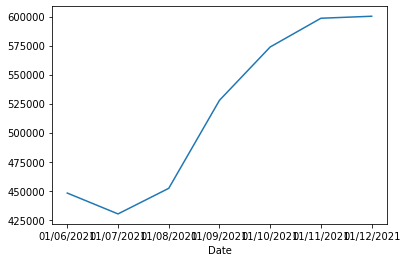

In [29]:
Sale_ma.plot()

In [30]:
Sale_base=pd.concat([Sale,Sale.shift(1)],axis=1)

In [31]:
Sale_base

,Sales,Sales
Date,,
01/01/2021,570881.0,NaN
01/02/2021,339843.0,570881.0
01/03/2021,299564.0,339843.0
01/04/2021,443315.0,299564.0
01/05/2021,457616.0,443315.0
01/06/2021,576618.0,457616.0
01/07/2021,463216.0,576618.0
01/08/2021,472102.0,463216.0
01/09/2021,754251.0,472102.0


In [32]:
Sale_base.columns=['Actual','Forecast']

In [33]:
Sale_base.dropna(inplace=True)

In [34]:
from sklearn.metrics import mean_squared_error


In [35]:
Sale_error=mean_squared_error(Sale_base.Actual,Sale_base.Forecast)

In [36]:
Sale_error

17902845008.454544

In [37]:
np.sqrt(Sale_error)

133801.51347594894

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

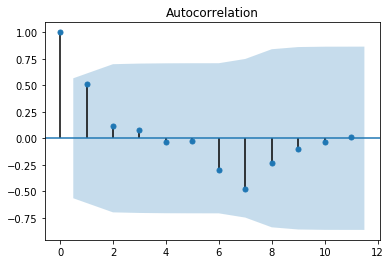

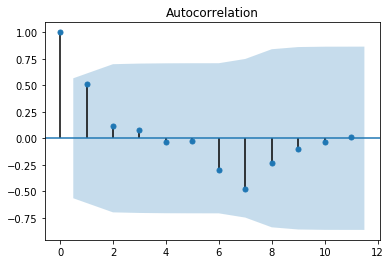

In [39]:
plot_acf(Sale)

In [40]:
Sale

Date
01/01/2021    570881.0
01/02/2021    339843.0
01/03/2021    299564.0
01/04/2021    443315.0
01/05/2021    457616.0
01/06/2021    576618.0
01/07/2021    463216.0
01/08/2021    472102.0
01/09/2021    754251.0
01/10/2021    718864.0
01/11/2021    605998.0
01/12/2021    586972.0
Name: Sales, dtype: float64

In [41]:
Sale=pd.to_numeric(Sale)

In [42]:
Sale=pd.DataFrame(Sale)

In [43]:
Sale

,Sales
Date,
01/01/2021,570881.0
01/02/2021,339843.0
01/03/2021,299564.0
01/04/2021,443315.0
01/05/2021,457616.0
01/06/2021,576618.0
01/07/2021,463216.0
01/08/2021,472102.0
01/09/2021,754251.0


In [44]:
Sale.head()

,Sales
Date,
01/01/2021,570881.0
01/02/2021,339843.0
01/03/2021,299564.0
01/04/2021,443315.0
01/05/2021,457616.0


In [45]:
Sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 01/01/2021 to 01/12/2021
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   12 non-null     float64
dtypes: float64(1)
memory usage: 512.0+ bytes


In [46]:
Sale.tail()

,Sales
Date,
01/08/2021,472102.0
01/09/2021,754251.0
01/10/2021,718864.0
01/11/2021,605998.0
01/12/2021,586972.0


In [47]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [48]:
stepwise_fit=auto_arima(Sale['Sales'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=320.979, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=319.541, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=317.152, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=352.856, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=319.779, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=348.886, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.936 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -155.576
Date:                Thu, 06 Jan 2022   AIC                            317.152
Time:                        21:04:25   BIC                            318.607
Sample:                             0   HQIC                           316.614
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.597e+05   6.69e+04      8.369      0.000    4.29e+05    6.91e+05
ma.L1          0.9194      0.467      1.969      0.049       0.004       1.834
sigma2      1.126e+10      0.317   3.55e+10      0.000    1.13e+10    1.13e+10
===================================================================================
Ljung-Box (Q):                        7.50   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.76   Prob(JB):                         0.83
Heteroskedasticity (H):               0.47   Skew:                            -0.30
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.34e+30. Standard errors may be unstable.
"""

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
train=Sale.iloc[0:11]
test=Sale.iloc[11:12]
test

,Sales
Date,
01/12/2021,586972.0


In [51]:
model=ARIMA(train['Sales'],order=(0,0,1))
model_fit=model.fit(disp=0)


In [52]:
pred=model_fit.predict(start='01/09/2021',end='01/12/2021')
pred.index=Sale.index[8:12]
print(pred)

Date
01/09/2021    590772.411897
01/10/2021    672660.070708
01/11/2021    567532.913499
01/12/2021    563994.424332
dtype: float64


In [53]:
Sale

,Sales
Date,
01/01/2021,570881.0
01/02/2021,339843.0
01/03/2021,299564.0
01/04/2021,443315.0
01/05/2021,457616.0
01/06/2021,576618.0
01/07/2021,463216.0
01/08/2021,472102.0
01/09/2021,754251.0


In [54]:
model=ARIMA(Sale['Sales'],order=(0,0,1))
model_fit=model.fit(disp=0)
pred=model_fit.forecast(steps=1)[0]

In [56]:
pred

array([548991.92357364])

WITHOUT STRONG SEASONALITY ITS HARD TO PREDICT FUTURE VALUES